In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

head(players)
head(sessions)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


## 1. Data Description


We use `inner_join` to connect the two datasets based on `hashedEmail`. 

* We continue to count the number of rows using `nrow`.
* We scan the numeric columns to compute summary statistics.
* We have the following variables

  * `experience`(character) - variable used to identify Beginner, Amateur, Veteran, Pro, and Regular players 

  * `subscribe`(logical) - variable to check if individual has subscribed for newsletter or not

  * `hashedEmail` (character) - email address translated into unique characters to maintain privacy

  * `played_hours`(double) - number of hours played

  * `name` (character) - name of player

  * `gender`(character) - Gender of player (M/F/Prefer not to say) 

  * `Age` (double) - age of player

  * `start_time`(character) - human readable start time (date, hour, minute)

  * `end_time` (character) - human readable end time (date, hour, minute) 

  * `original_start_time` & `original_end_time` (double) - appears to be stored as large numeric values, likely representing a Unix timestamp. This is a common way of storing dates and times as the number of seconds (or milliseconds) since January 1, 1970 (UTC).


Some issues with the data are:
* all times need to be converted into the `datetime` format
* `experience` and `gender` should be stored as categorical instead of character variables


In [3]:
combined_join <- players |>
    inner_join(sessions, by = "hashedEmail") |>
    arrange(start_time)

head(combined_join)

experience,subscribe,hashedEmail,played_hours,name,gender,Age,start_time,end_time,original_start_time,original_end_time
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Veteran,FALSE,88247d9a46fc214a12485dcbcbb03a8ddebfe8c1ec5fe209cd660147625c8e62,1.4,Aiden,Prefer not to say,25,01/05/2024 00:58,01/05/2024 01:24,1.71453e+12,1.71453e+12
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,01/05/2024 02:28,01/05/2024 02:41,1.71453e+12,1.71453e+12
Regular,TRUE,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,223.1,Hiroshi,Male,17,01/05/2024 02:41,01/05/2024 03:24,1.71453e+12,1.71453e+12
Amateur,TRUE,24d4892c2c3ce11d3e54c3bf31ee218901cac7a2f564911d67424c8fdf0874fe,32.0,Sidney,Male,22,01/05/2024 03:29,01/05/2024 04:38,1.71453e+12,1.71454e+12
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,01/05/2024 04:54,01/05/2024 06:17,1.71454e+12,1.71454e+12
Amateur,TRUE,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,150.0,Delara,Female,16,01/05/2024 05:46,01/05/2024 06:48,1.71454e+12,1.71455e+12


In [4]:
combined_join_rows <- nrow(combined_join)
combined_join_rows

[1] 1535

In [5]:
summary_stats <- combined_join |>
    select_if(is.numeric) |>
    summary()

summary_stats

  played_hours         Age        original_start_time original_end_time  
 Min.   :  0.00   Min.   : 8.00   Min.   :1.712e+12   Min.   :1.712e+12  
 1st Qu.: 32.00   1st Qu.:17.00   1st Qu.:1.716e+12   1st Qu.:1.716e+12  
 Median : 56.10   Median :18.00   Median :1.719e+12   Median :1.719e+12  
 Mean   : 98.57   Mean   :19.35   Mean   :1.719e+12   Mean   :1.719e+12  
 3rd Qu.:178.20   3rd Qu.:23.00   3rd Qu.:1.722e+12   3rd Qu.:1.722e+12  
 Max.   :223.10   Max.   :50.00   Max.   :1.727e+12   Max.   :1.727e+12  
                  NA's   :2                           NA's   :2          

## 2. Questions

The broad question I'm choosing is:

**What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?**

The specific question I'm choosing is: 

**Can player experience level, total hours played, and number of active days predict subscription in the UBC Minecraft dataset?**

Instead of having every session detail, we could find the number of unique active days for each user. This would help us condense the above table. We could find total hours played by grouping users according to their hashed email. 

## 3. Exploratory data analysis & visualization

We start with using the previous combined dataframe to group by hashed email to find unique players. We then count their total sessions, find their active days (by using distinct), and eliminating the hashed email column now. 


In [6]:
combined_join <- combined_join |>
  mutate(start_date = as.Date(dmy_hm(start_time)))

distinct_players <- combined_join |>
    group_by(hashedEmail) |>
    summarise(
        name = first(name),
        experience = first(experience),  
        subscribe = first(subscribe), 
        played_hours = first(played_hours),
        Age = first(Age),
        total_sessions = n(),  
        active_days = n_distinct(start_date)  # Unique days active
    ) |>
    select(-hashedEmail) |>
    arrange(name)

distinct_players 

name,experience,subscribe,played_hours,Age,total_sessions,active_days
<chr>,<chr>,<lgl>,<dbl>,<dbl>,<int>,<int>
Aarav,Beginner,TRUE,0.2,17,1,1
Aaron,Amateur,TRUE,1.2,17,2,2
Ahmed,Pro,TRUE,0.2,NA,1,1
Aiden,Veteran,FALSE,1.4,25,6,6
Akio,Regular,TRUE,218.1,20,95,61
Alex,Amateur,TRUE,53.9,17,130,47
Amelia,Beginner,FALSE,1.8,32,1,1
Amelie,Beginner,TRUE,0.7,24,1,1
Anastasia,Amateur,FALSE,0.1,17,1,1


We then turn experience and subscription variables to factor variables.

In [7]:
distinct_players <- distinct_players |>
    mutate(experience = as_factor(experience)) |>
    mutate(subscribe = as_factor(subscribe))

head(distinct_players)

name,experience,subscribe,played_hours,Age,total_sessions,active_days
<chr>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>
Aarav,Beginner,TRUE,0.2,17,1,1
Aaron,Amateur,TRUE,1.2,17,2,2
Ahmed,Pro,TRUE,0.2,NA,1,1
Aiden,Veteran,FALSE,1.4,25,6,6
Akio,Regular,TRUE,218.1,20,95,61
Alex,Amateur,TRUE,53.9,17,130,47


We now graph a plot showing the relationship between number of hours played and subscription.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


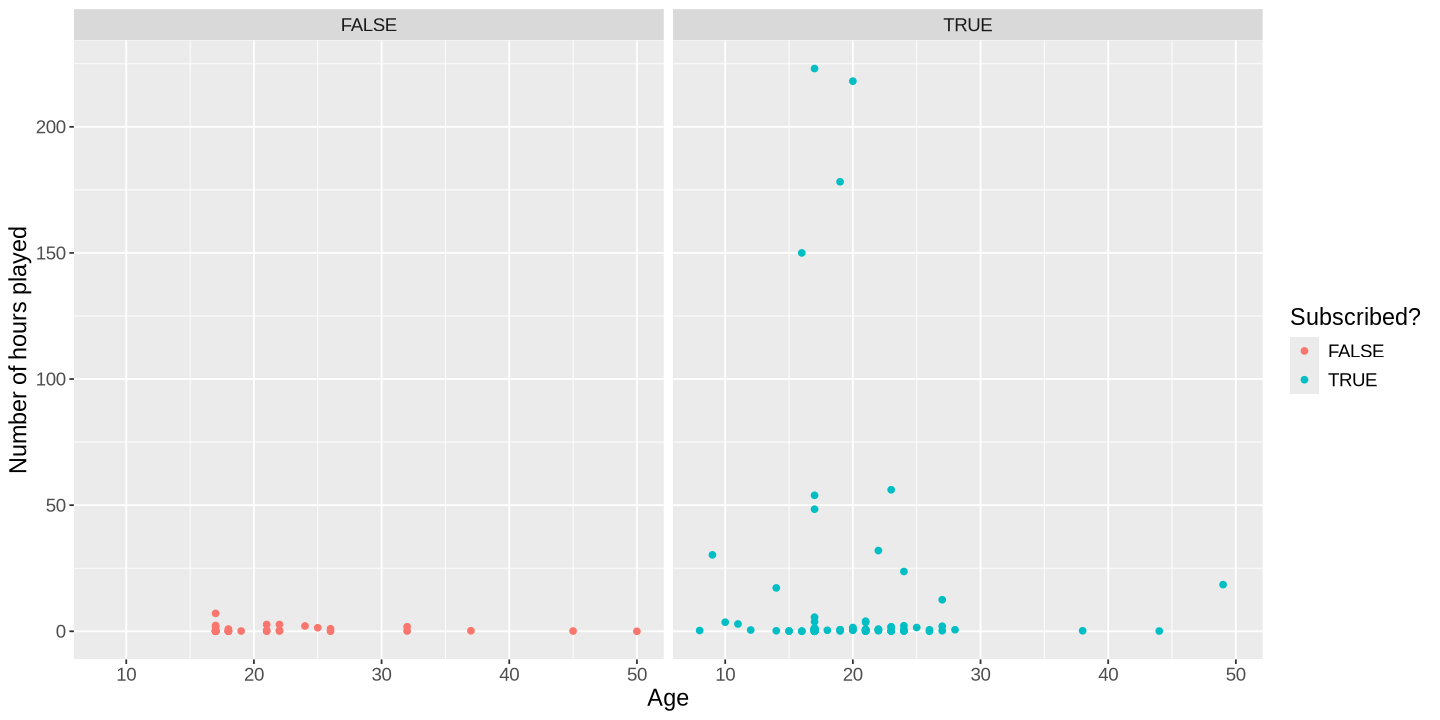

In [8]:
options(repr.plot.height = 6, repr.plot.width = 12)

distinct_plot <- distinct_players |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age",
         y = "Number of hours played",
         color = "Subscribed?") +
    facet_grid(cols = vars(subscribe)) +
    theme(text = element_text(size = 14))

distinct_plot

On examination, we find that users with close to 0 hours played have not subscribed to the newsletter, which would make intuitive sense as they may not be interested in reading about the game. 

## 4. Methods & Plan

- I would choose regression to further explore this relationship, as I could regress multiple explanatory variables on the response variables to find varying coefficients. 

- We would assume no multicollinearity, linearity, and independent observations. 

- The advantages are that this would work well with multiple predictors and can predict beyond the range of observed variables.

- I would split my data into 5 folds for cross validation to ensure proper randomization. This would also ensure cross checking within the training set before predictions with the testing set.